In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParamsDefault
import numpy as np
%matplotlib inline

plt.rcParams.update(rcParamsDefault)
large = 22; med = 12; small = 10
params = {'legend.fontsize': med,
      'figure.figsize': (8, 6),
      'axes.labelsize': med,
      'axes.titlesize': med,
      'xtick.labelsize': med,
      'ytick.labelsize': med,
      'figure.titlesize': large,
      'image.origin': 'lower',
      'xtick.major.size': 4,
      'ytick.major.size': 4,
      'xtick.major.width': 0.5,
      'ytick.major.width': 0.5,
      'xtick.minor.size': 4,
      'xtick.minor.width': 0.5,
      'ytick.minor.size': 4,
      'ytick.minor.width': 0.5,
      'axes.linewidth': 0.75,
      'xtick.direction' : 'in', 
      'ytick.direction' : 'in', 
      'font.family': 'sans-serif', 
      'font.sans-serif' : 'Open Sans',
      'font.weight': 'light', # ultralight, light, regular, medium, bold 
      'font.style': 'normal', # normal, italic
         }
plt.rcParams.update(params)
plt.rcParams["figure.dpi"]=150
plt.rcParams["figure.facecolor"]="white"
plt.rcParams["figure.figsize"]=(8, 4)

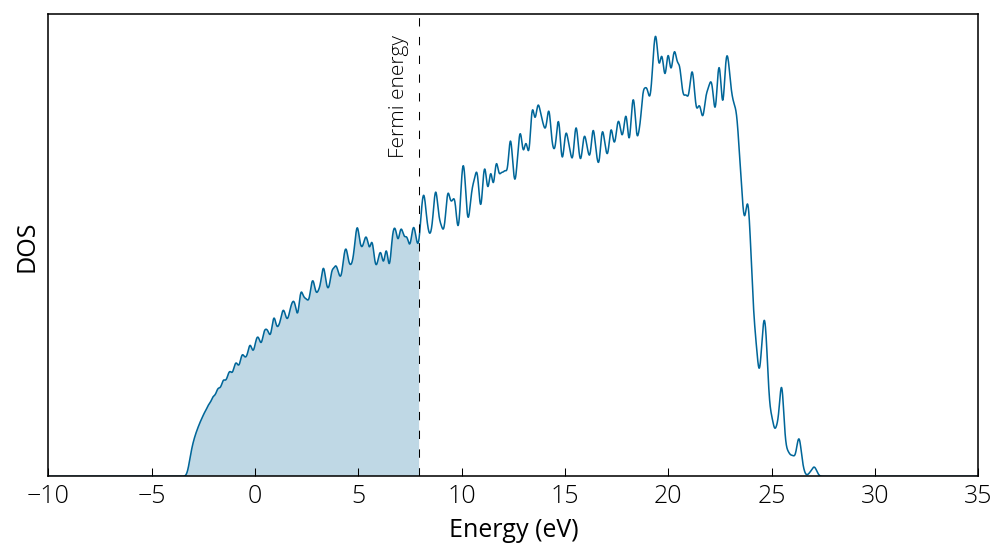

In [2]:
energy, dos, idos = np.loadtxt('../src/al/al_dos.dat', unpack=True)

plt.plot(energy, dos, linewidth=0.75, color='#006699')
plt.yticks([])
plt.xlabel('Energy (eV)')
plt.ylabel('DOS')
plt.axvline(x= 7.9421, linewidth=0.5, color='k', linestyle=(0, (8, 10)))
plt.xlim(-10, 35)
plt.ylim(0, )
plt.fill_between(energy, 0, dos, where=(energy < 7.9421), facecolor='#006699', alpha=0.25)
plt.text(6.5, 0.52, 'Fermi energy', fontsize= small, rotation=90)
plt.show()

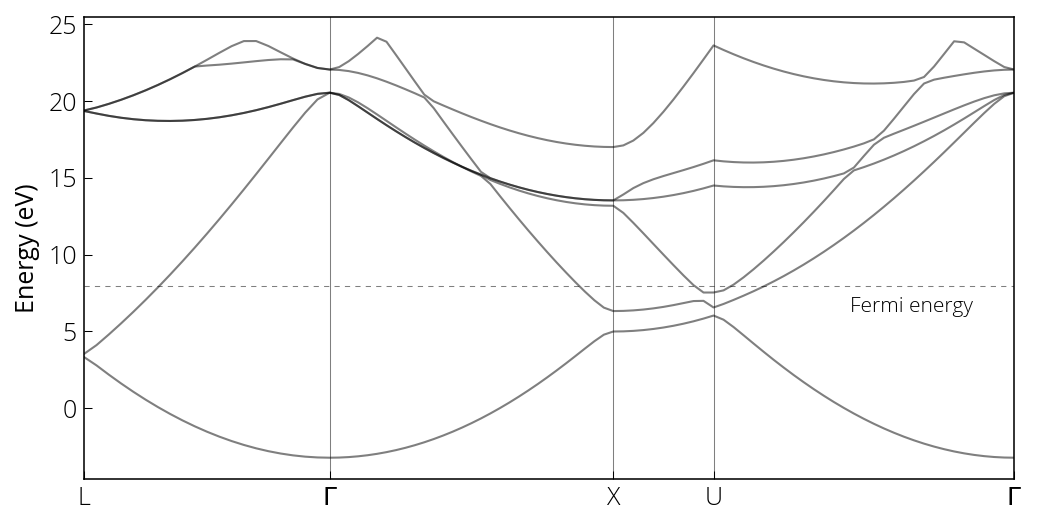

In [3]:
data = np.loadtxt('../src/al/al_bands.dat.gnu')

energy = np.unique(data[:, 0])
bands = np.reshape(data[:, 1], (-1, len(energy)))

for band in range(len(bands)):
    plt.plot(energy, bands[band, :], linewidth=1, alpha=0.5, color='k')
plt.xlim(min(energy), max(energy))

# Fermi energy
plt.axhline(y=7.9421, linewidth=0.5, color='k', alpha=0.5, linestyle=(0, (5, 5)))
# High symmetry k-points (check bands_pp.out)
plt.axvline(x=0.8660, linewidth=0.5, color='k', alpha=0.5)
plt.axvline(x=1.8660, linewidth=0.5, color='k', alpha=0.5)
plt.axvline(x=2.2196, linewidth=0.5, color='k', alpha=0.5)
# text labels
plt.xticks(ticks= [0, 0.8660, 1.8660, 2.2196, energy[-1]], \
           labels=['L', '$\Gamma$', 'X', 'U', '$\Gamma$'])
plt.ylabel("Energy (eV)")
plt.text(2.7, 6.3, 'Fermi energy', fontsize= small)
plt.show()

In [4]:
gauss_k4 = np.loadtxt("../src/al/gauss.k4.dat")
gauss_k8 = np.loadtxt("../src/al/gauss.k8.dat")
gauss_k12 = np.loadtxt("../src/al/gauss.k12.dat")
gauss_k16 = np.loadtxt("../src/al/gauss.k16.dat")

mp_k4 = np.loadtxt("../src/al/m-p.k4.dat")
mp_k8 = np.loadtxt("../src/al/m-p.k8.dat")
mp_k12 = np.loadtxt("../src/al/m-p.k12.dat")
mp_k16 = np.loadtxt("../src/al/m-p.k16.dat")

mv_k4 = np.loadtxt("../src/al/m-v.k4.dat")
mv_k8 = np.loadtxt("../src/al/m-v.k8.dat")
mv_k12 = np.loadtxt("../src/al/m-v.k12.dat")
mv_k16 = np.loadtxt("../src/al/m-v.k16.dat")

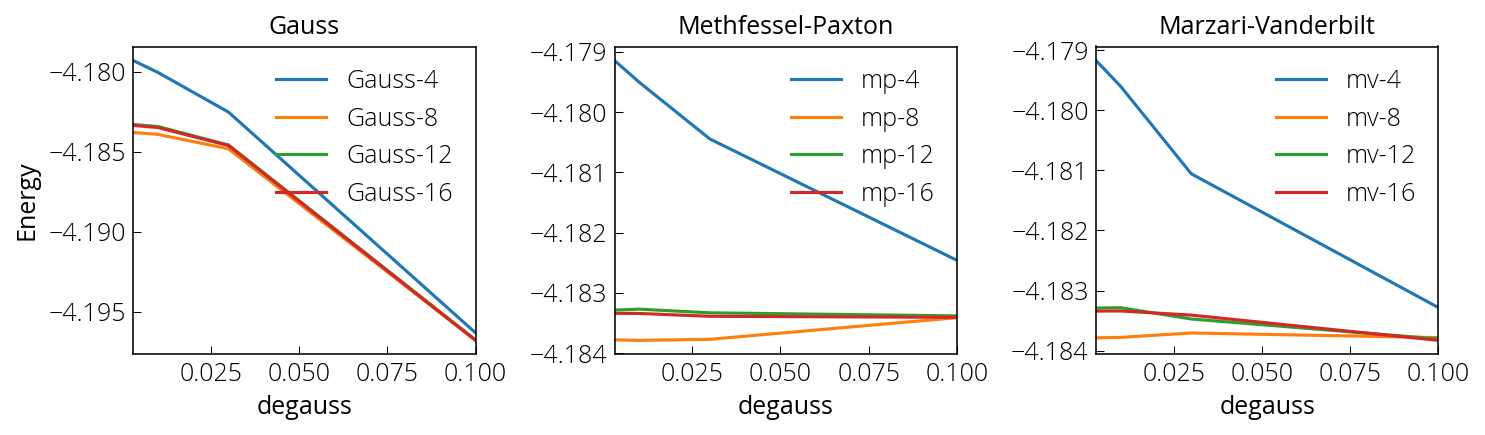

In [5]:
fig = plt.figure(figsize = (10, 3))
plt.subplot(131)
plt.plot(gauss_k4[:, 0], gauss_k4[:, 1], label="Gauss-4")
plt.plot(gauss_k8[:, 0], gauss_k8[:, 1], label="Gauss-8")
plt.plot(gauss_k12[:, 0], gauss_k12[:, 1], label="Gauss-12")
plt.plot(gauss_k16[:, 0], gauss_k16[:, 1], label="Gauss-16")
plt.legend(frameon=False)
plt.xlim(gauss_k4[0, 0], gauss_k4[-1, 0])
plt.title("Gauss")
plt.xlabel("degauss")
plt.ylabel("Energy")

plt.subplot(132)
plt.plot(mp_k4[:, 0], mp_k4[:, 1], label="mp-4")
plt.plot(mp_k8[:, 0], mp_k8[:, 1], label="mp-8")
plt.plot(mp_k12[:, 0], mp_k12[:, 1], label="mp-12")
plt.plot(mp_k16[:, 0], mp_k16[:, 1], label="mp-16")
plt.legend(frameon=False)
plt.xlim(mp_k4[0, 0], mp_k4[-1, 0])
plt.title("Methfessel-Paxton")
plt.xlabel("degauss")

plt.subplot(133)
plt.plot(mv_k4[:, 0], mv_k4[:, 1], label="mv-4")
plt.plot(mv_k8[:, 0], mv_k8[:, 1], label="mv-8")
plt.plot(mv_k12[:, 0], mv_k12[:, 1], label="mv-12")
plt.plot(mv_k16[:, 0], mv_k16[:, 1], label="mv-16")
plt.legend(frameon=False)
plt.xlim(mv_k4[0, 0], mv_k4[-1, 0])
plt.title("Marzari-Vanderbilt")
plt.xlabel("degauss")

plt.tight_layout()
plt.show()